In [44]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers

In [45]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Artifial Intelligence\train.csv')


In [46]:
df

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2018,12,31,21,30,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.700,204.0,3.5,100
175292,2018,12,31,22,0,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.800,209.0,3.2,100
175293,2018,12,31,22,30,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.800,208.0,2.6,57
175294,2018,12,31,23,0,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.700,206.0,2.1,0


In [47]:
columns_titles = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI']
     
df =df.reindex(columns=columns_titles)

In [48]:
scaler = MinMaxScaler()
data_scaled=scaler.fit_transform(df)

In [57]:
df.iloc[:,15:18]

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
175291,51,555,168
175292,37,388,84
175293,15,115,18
175294,0,0,0


In [58]:
features=data_scaled
target=data_scaled[:,15:18]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)
win_length=3
batch_size=32
num_features=18
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

layers=4[(h+i)*h+h]
layers=4[(128+8)*128+128]

In [93]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LSTM(50,return_sequences=False))
model.add(tf.keras.layers.Dense(3))

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 100)            47600     
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 77,953
Trainable params: 77,953
Non-trainable params: 0
_________________________________________________________________


In [96]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2, mode='min')

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator,epochs=10,
                           validation_data=test_generator,
                           shuffle=False,
                           callbacks=[early_stopping])

Epoch 1/10


C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\2432340713.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=10,


4383/4383 [==============================] - 15s 3ms/step - loss: 0.0021 - mean_absolute_error: 0.0266 - val_loss: 0.0014 - val_mean_absolute_error: 0.0195
Epoch 2/10
4383/4383 [==============================] - 12s 3ms/step - loss: 4.7930e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0015 - val_mean_absolute_error: 0.0231
Epoch 3/10
4383/4383 [==============================] - 12s 3ms/step - loss: 2.5214e-04 - mean_absolute_error: 0.0092 - val_loss: 6.7946e-04 - val_mean_absolute_error: 0.0134
Epoch 4/10
4383/4383 [==============================] - 12s 3ms/step - loss: 1.6686e-04 - mean_absolute_error: 0.0070 - val_loss: 3.9347e-04 - val_mean_absolute_error: 0.0115
Epoch 5/10
4383/4383 [==============================] - 12s 3ms/step - loss: 1.2732e-04 - mean_absolute_error: 0.0058 - val_loss: 3.8536e-04 - val_mean_absolute_error: 0.0115
Epoch 6/10
4383/4383 [==============================] - 12s 3ms/step - loss: 1.1853e-04 - mean_absolute_error: 0.0055 - val_loss: 5.3906e-04 - val_m

In [95]:
print("lstm output layer",model.get_layer(index=2).output_shape)

lstm output layer (None, 3)


In [97]:
model.evaluate_generator(test_generator,verbose=0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\267665090.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,verbose=0)


[0.00044296419946476817, 0.011378415860235691]

In [98]:
test_generator[0]

(array([[[0.77777778, 1.        , 1.        , ..., 0.1079646 ,
          0.59230769, 0.19943556],
         [0.77777778, 1.        , 1.        , ..., 0.12743363,
          0.67596154, 0.28222013],
         [0.77777778, 1.        , 1.        , ..., 0.14867257,
          0.71442308, 0.35559737]],
 
        [[0.77777778, 1.        , 1.        , ..., 0.12743363,
          0.67596154, 0.28222013],
         [0.77777778, 1.        , 1.        , ..., 0.14867257,
          0.71442308, 0.35559737],
         [0.77777778, 1.        , 1.        , ..., 0.15929204,
          0.75576923, 0.42144873]],
 
        [[0.77777778, 1.        , 1.        , ..., 0.14867257,
          0.71442308, 0.35559737],
         [0.77777778, 1.        , 1.        , ..., 0.15929204,
          0.75576923, 0.42144873],
         [0.77777778, 1.        , 1.        , ..., 0.18230088,
          0.75961538, 0.47130762]],
 
        ...,
 
        [[0.88888889, 0.        , 0.        , ..., 0.        ,
          0.        , 0.       

In [118]:
prediction=model.predict_generator(test_generator)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\3104476467.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction=model.predict_generator(test_generator)


In [120]:
print(prediction)
print(np.shape(prediction))

[[0.16081849 0.76458144 0.4211983 ]
 [0.1680314  0.79090065 0.47841644]
 [0.18924803 0.7879155  0.5129187 ]
 ...
 [0.00521446 0.02741988 0.00121932]
 [0.00979147 0.01736106 0.01108639]
 [0.00907058 0.02016397 0.00978785]]
(35057, 3)


In [121]:
prediction.shape

(35057, 3)

In [140]:
pd.DataFrame(prediction)

,0,1,2
0,0.160818,0.764581,0.421198
1,0.168031,0.790901,0.478416
2,0.189248,0.787916,0.512919
3,0.192979,0.794933,0.540150
4,0.206164,0.784440,0.544840
...,...,...,...
35052,0.099775,0.508788,0.155115
35053,0.068813,0.339796,0.070386
35054,0.005214,0.027420,0.001219
35055,0.009791,0.017361,0.011086


In [139]:
# make predictions


# print testPredict
# print np.shape(testPredict)
# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(prediction),3))
print (trainPredict_extended)
print (np.shape(trainPredict_extended[:,2]))
print (np.shape(prediction[:,0]))
# Put the predictions there
#trainPredict_extended[:,2] = trainPredict[:,0]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(35057,)
(35057,)


In [125]:
df_pred=pd.concat([pd.DataFrame(x_test[:,0:15][win_length:]),pd.DataFrame(prediction)],axis=1)

In [141]:
df_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,0,1,2
0,0.777778,1.0,1.0,0.652174,1.0,0.0,0.387244,0.367347,0.740741,0.532378,0.333558,0.188440,0.434444,0.186047,0.01,0.160818,0.764581,0.421198
1,0.777778,1.0,1.0,0.695652,0.0,0.0,0.364465,0.387755,0.740741,0.417627,0.314049,0.190816,0.464167,0.232558,0.01,0.168031,0.790901,0.478416
2,0.777778,1.0,1.0,0.695652,1.0,0.0,0.364465,0.387755,0.740741,0.417412,0.298957,0.192267,0.464167,0.232558,0.01,0.189248,0.787916,0.512919
3,0.777778,1.0,1.0,0.739130,0.0,0.0,0.387244,0.408163,0.740741,0.413964,0.288957,0.193851,0.504722,0.232558,0.01,0.192979,0.794933,0.540150
4,0.777778,1.0,1.0,0.739130,1.0,0.0,0.387244,0.408163,0.740741,0.413749,0.284417,0.202032,0.504722,0.217054,0.01,0.206164,0.784440,0.544840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35052,1.000000,1.0,1.0,0.913043,1.0,0.4,0.829157,0.608163,0.703704,0.911324,0.425215,0.472156,0.566667,0.271318,1.00,0.099775,0.508788,0.155115
35053,1.000000,1.0,1.0,0.956522,0.0,0.4,0.822323,0.593878,0.703704,0.934059,0.456933,0.485352,0.580556,0.248062,1.00,0.068813,0.339796,0.070386
35054,1.000000,1.0,1.0,0.956522,1.0,0.7,0.822323,0.583673,0.703704,0.965844,0.489387,0.485352,0.577778,0.201550,0.57,0.005214,0.027420,0.001219
35055,1.000000,1.0,1.0,1.000000,0.0,0.7,0.813212,0.575510,0.722222,0.965952,0.526319,0.472156,0.572222,0.162791,0.00,0.009791,0.017361,0.011086


In [126]:
pred=pd.DataFrame(prediction)

In [127]:
print(prediction.shape)
print(y_test.shape)

(35057, 3)
(35060, 3)


In [128]:
rev_trans=scaler.inverse_transform(df_pred)

In [142]:
rev_trans

array([[2.01600000e+03, 1.20000000e+01, 3.10000000e+01, ...,
        9.08624454e+01, 7.95164700e+02, 4.47733802e+02],
       [2.01600000e+03, 1.20000000e+01, 3.10000000e+01, ...,
        9.49377379e+01, 8.22536674e+02, 5.08556679e+02],
       [2.01600000e+03, 1.20000000e+01, 3.10000000e+01, ...,
        1.06925134e+02, 8.19432149e+02, 5.45232589e+02],
       ...,
       [2.01800000e+03, 1.20000000e+01, 3.10000000e+01, ...,
        2.94617001e+00, 2.85166752e+01, 1.29613431e+00],
       [2.01800000e+03, 1.20000000e+01, 3.10000000e+01, ...,
        5.53218115e+00, 1.80555022e+01, 1.17848320e+01],
       [2.01800000e+03, 1.20000000e+01, 3.10000000e+01, ...,
        5.12487501e+00, 2.09705269e+01, 1.04044886e+01]])

In [167]:
df_final=df[prediction.shape[0]*-1:]  #### df[-882984:]

df_final.count()

Year                  35057
Month                 35057
Day                   35057
Hour                  35057
Minute                35057
Cloud Type            35057
Dew Point             35057
Temperature           35057
Pressure              35057
Relative Humidity     35057
Solar Zenith Angle    35057
Precipitable Water    35057
Wind Direction        35057
Wind Speed            35057
Fill Flag             35057
Clearsky DHI          35057
Clearsky DNI          35057
Clearsky GHI          35057
dtype: int64

In [168]:
rev_trans.shape

(35057, 18)

In [169]:
df_final['pred_DHI']=rev_trans[:,15]
df_final['pred_DNI']=rev_trans[:,16]
df_final['pred_GHI']=rev_trans[:,17]

C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\1222505001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred_DHI']=rev_trans[:,15]
C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\1222505001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred_DNI']=rev_trans[:,16]
C:\Users\Admin\AppData\Local\Temp\ipykernel_2420\1222505001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [170]:
rev_trans[:,18:]

array([], shape=(35057, 0), dtype=float64)

In [171]:
df_final

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,...,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,pred_DHI,pred_DNI,pred_GHI
140239,2016,12,31,15,30,0,0.0,9.0,1010,56.60,...,1.550,156.4,2.4,1,90,786,448,90.862445,795.164700,447.733802
140240,2016,12,31,16,0,0,-1.0,10.0,1010,45.95,...,1.568,167.1,3.0,1,103,790,501,94.937738,822.536674,508.556679
140241,2016,12,31,16,30,0,-1.0,10.0,1010,45.93,...,1.579,167.1,3.0,1,106,811,544,106.925134,819.432149,545.232589
140242,2016,12,31,17,0,0,0.0,11.0,1010,45.61,...,1.591,181.7,3.0,1,115,804,568,109.032971,826.730466,574.179056
140243,2016,12,31,17,30,0,0.0,11.0,1010,45.59,...,1.653,181.7,2.8,1,115,807,580,116.482678,815.818076,579.165024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2018,12,31,21,30,4,19.4,20.8,1008,91.77,...,3.700,204.0,3.5,100,51,555,168,56.372998,529.139509,164.886905
175292,2018,12,31,22,0,4,19.1,20.1,1008,93.88,...,3.800,209.0,3.2,100,37,388,84,38.879318,353.388219,74.819859
175293,2018,12,31,22,30,7,19.1,19.6,1008,96.83,...,3.800,208.0,2.6,57,15,115,18,2.946170,28.516675,1.296134
175294,2018,12,31,23,0,7,18.7,19.2,1009,96.84,...,3.700,206.0,2.1,0,0,0,0,5.532181,18.055502,11.784832


<AxesSubplot:>

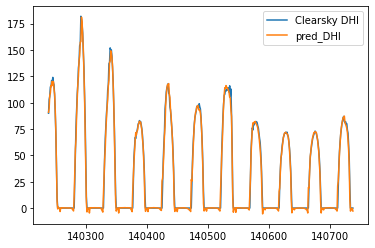

In [177]:
df_final[['Clearsky DHI','pred_DHI']].head(500 ).plot()


In [173]:
from sklearn.metrics import mean_absolute_error as mae
mae(df_final['Clearsky DHI'],df_final['pred_DHI'])

3.615395602826124

In [152]:
df_final.head(50)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,...,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI,pred_DHI,pred_DNI,pred_GHI
140239,2016,12,31,15,30,0,0.0,9.0,1010,56.60,...,1.550,156.4,2.4,1,90,786,448,90.862445,795.164700,447.733802
140240,2016,12,31,16,0,0,-1.0,10.0,1010,45.95,...,1.568,167.1,3.0,1,103,790,501,94.937738,822.536674,508.556679
140241,2016,12,31,16,30,0,-1.0,10.0,1010,45.93,...,1.579,167.1,3.0,1,106,811,544,106.925134,819.432149,545.232589
140242,2016,12,31,17,0,0,0.0,11.0,1010,45.61,...,1.591,181.7,3.0,1,115,804,568,109.032971,826.730466,574.179056
140243,2016,12,31,17,30,0,0.0,11.0,1010,45.59,...,1.653,181.7,2.8,1,115,807,580,116.482678,815.818076,579.165024
140244,2016,12,31,18,0,0,0.0,12.0,1010,45.22,...,1.715,197.6,2.7,1,121,787,571,115.672722,810.275779,575.583551
140245,2016,12,31,18,30,0,0.0,12.0,1010,45.21,...,1.816,197.6,2.4,1,119,775,550,120.317722,784.205508,547.529570
140246,2016,12,31,19,0,0,1.0,12.0,1010,47.41,...,1.917,213.1,2.1,1,124,729,509,116.806176,762.049274,511.707685
140247,2016,12,31,19,30,0,1.0,11.0,1010,50.64,...,2.051,213.1,1.7,1,119,699,458,120.012157,708.364654,452.806319
140248,2016,12,31,20,0,0,2.0,11.0,1010,56.20,...,2.185,212.4,1.4,1,117,637,392,112.906069,660.111990,390.959992


In [180]:
Predicted_data=df_final.iloc[:,15:]

In [182]:
Predicted_data.to_csv('C:/Users/Admin/Desktop/All Machine Learning for kanoda/wipro.csv')